# Name: Vaibhav shaligram patil
# Batch: ML 09
# Std    : TY Bsc(cs)
# Project Name: Loan Repayment Pediction 

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import warnings
from  sklearn.metrics  import  accuracy_score ,confusion_matrix,classification_report
#from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('C:\\Users\\ACER\\Downloads\\loan_data.csv')

In [3]:
data.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [4]:
data.tail(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
8989,0,major_purchase,0.1600,175.79,11.512925,22.22,672,4769.958333,37335,55.7,6,0,0,0
8990,0,debt_consolidation,0.1505,291.41,11.225243,7.12,687,2010.000000,7,0.2,5,0,0,0
8991,0,credit_card,0.1411,82.15,10.858999,11.28,677,1559.958333,7718,65.4,4,0,0,0
8992,0,credit_card,0.1537,522.70,11.350359,4.04,702,9180.958333,12415,47.6,7,0,0,0
8993,0,educational,0.1663,177.35,9.852194,17.68,662,2639.958333,679,18.9,6,0,0,1
8994,0,major_purchase,0.2011,91.19,9.305651,3.16,667,570.000000,242,9.7,6,0,0,0
8995,0,all_other,0.1726,35.79,9.903488,3.00,682,570.000000,1131,49.2,0,0,0,0
8996,0,all_other,0.1758,170.73,9.615805,11.68,707,1650.000000,0,0.0,9,0,0,0
8997,0,debt_consolidation,0.1790,541.50,11.461632,0.80,687,779.958333,3118,52.0,3,0,0,0
8998,0,all_other,0.1568,280.02,11.396392,12.08,677,7170.000000,22187,45.5,6,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      8999 non-null   int64  
 1   purpose            8999 non-null   object 
 2   int.rate           8999 non-null   float64
 3   installment        8999 non-null   float64
 4   log.annual.inc     8999 non-null   float64
 5   dti                8999 non-null   float64
 6   fico               8999 non-null   int64  
 7   days.with.cr.line  8999 non-null   float64
 8   revol.bal          8999 non-null   int64  
 9   revol.util         8999 non-null   float64
 10  inq.last.6mths     8999 non-null   int64  
 11  delinq.2yrs        8999 non-null   int64  
 12  pub.rec            8999 non-null   int64  
 13  not_fully_paid     8999 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 984.4+ KB


In [6]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
count,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,0.856762,0.121268,316.896367,10.923897,12.540083,711.559951,4542.516738,15012.889099,46.591970,1.397600,0.163574,0.061007,0.155351
std,0.350335,0.026293,204.492019,0.608407,6.884212,38.485235,2481.046190,23176.690380,29.099532,2.067256,0.547501,0.261118,0.362259
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.102250,163.680000,10.554249,7.150000,682.000000,2801.020833,3179.000000,22.100000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.121800,268.480000,10.915088,12.560000,707.000000,4110.041667,8497.000000,46.100000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.138700,427.380000,11.289782,17.870000,737.000000,5700.041667,17777.000000,70.800000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.212100,918.020000,14.528354,29.960000,827.000000,17639.958330,407794.000000,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not_fully_paid       0
dtype: int64

In [8]:
data.purpose.value_counts()

debt_consolidation    3735
all_other             2180
credit_card           1206
home_improvement       577
small_business         572
major_purchase         413
educational            316
Name: purpose, dtype: int64

# it is 6 unique values in purpose column


In [9]:
data.not_fully_paid.value_counts()

0    7601
1    1398
Name: not_fully_paid, dtype: int64

# Encoding

# using **Label Encoder** to convert labels available in purpose feature value in between 0 and 5.


In [10]:
data['purpose']=LabelEncoder().fit_transform(data['purpose'])
data.head(10)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,2,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,0,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,4,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,2,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


# Data Visualization 

<Axes: xlabel='not_fully_paid', ylabel='count'>

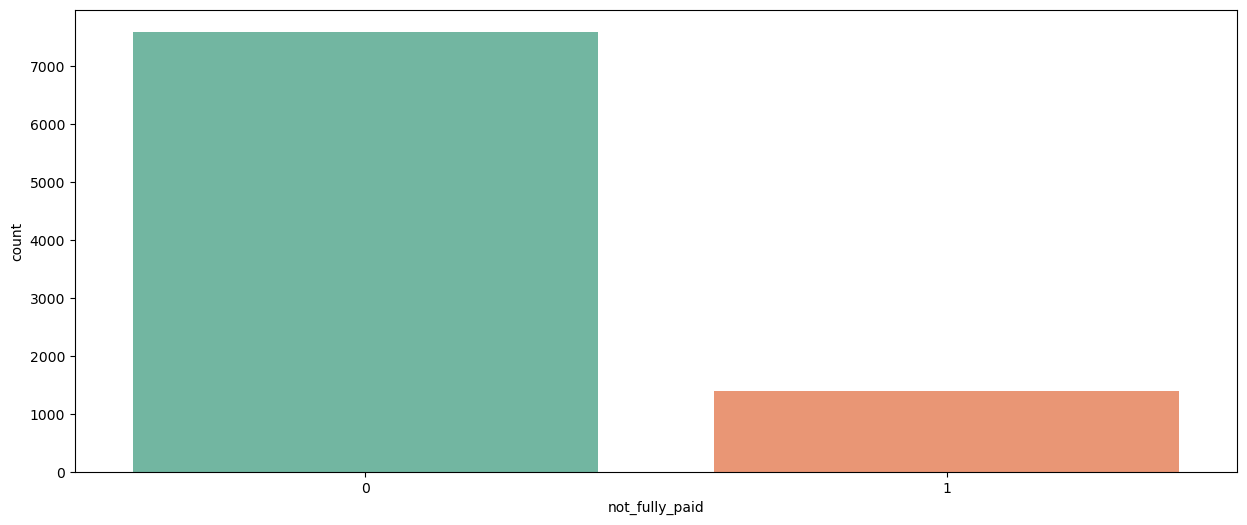

In [11]:
plt.figure(figsize=(15, 6))
sns.countplot(x='not_fully_paid',data=data,palette='Set2')

<Axes: xlabel='credit.policy', ylabel='count'>

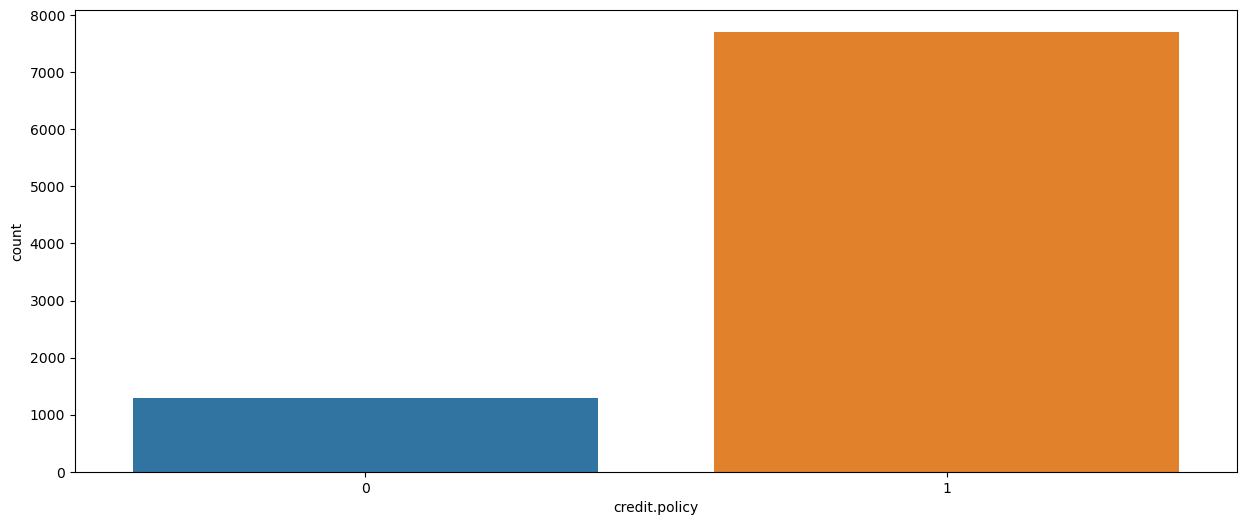

In [12]:
plt.figure(figsize=(15, 6))
sns.countplot(x='credit.policy',data=data)

Text(0.5, 0, 'FICO')

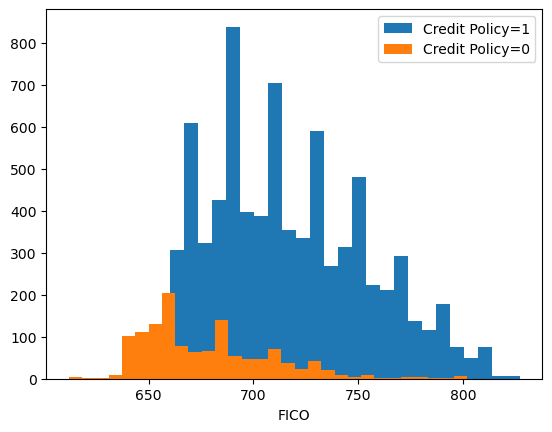

In [13]:
plt.hist(data['fico'].loc[data['credit.policy']==1], bins=30, label='Credit Policy=1')
plt.hist(data['fico'].loc[data['credit.policy']==0], bins=30, label='Credit Policy=0')
plt.legend()
plt.xlabel('FICO')



Text(0.5, 0, 'FICO')

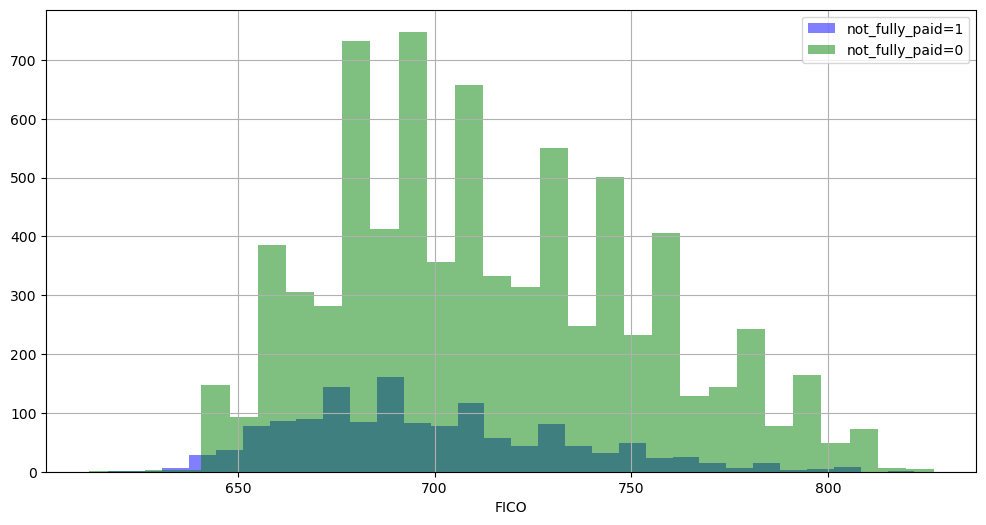

In [14]:
plt.figure(figsize=(12,6))
data[data['not_fully_paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not_fully_paid=1')
data[data['not_fully_paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='not_fully_paid=0')
plt.legend()
plt.xlabel('FICO')

Text(0, 0.5, 'Count')

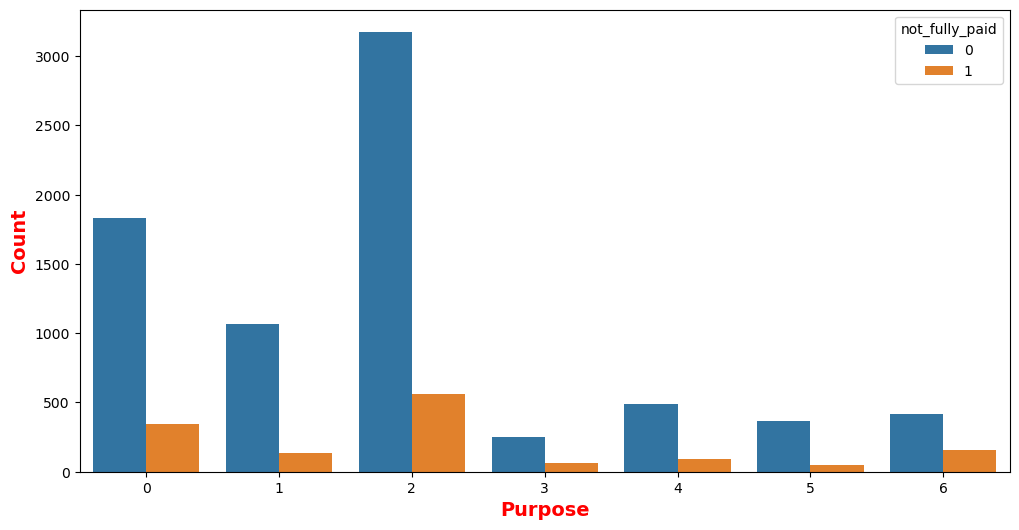

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='purpose', hue='not_fully_paid')
plt.xlabel('Purpose', fontsize=14, color='red',fontweight='heavy')
plt.ylabel('Count', fontsize=14, color='red',fontweight='heavy')


Text(0, 0.5, 'Int.Rate')

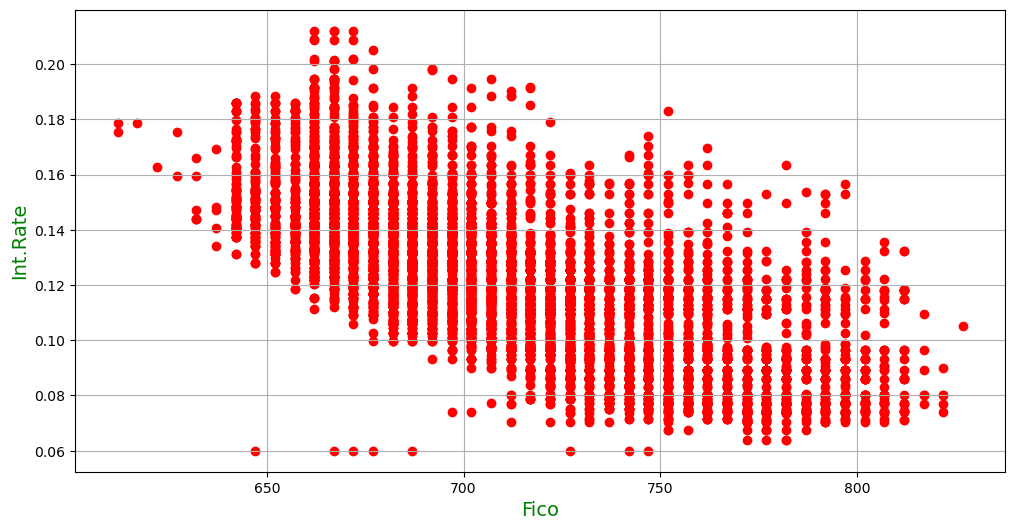

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(x='fico',y='int.rate',color='red',data=data)
plt.grid()

plt.xlabel('Fico', fontsize=14, color='green')
plt.ylabel('Int.Rate', fontsize=14, color='green')

<Axes: >

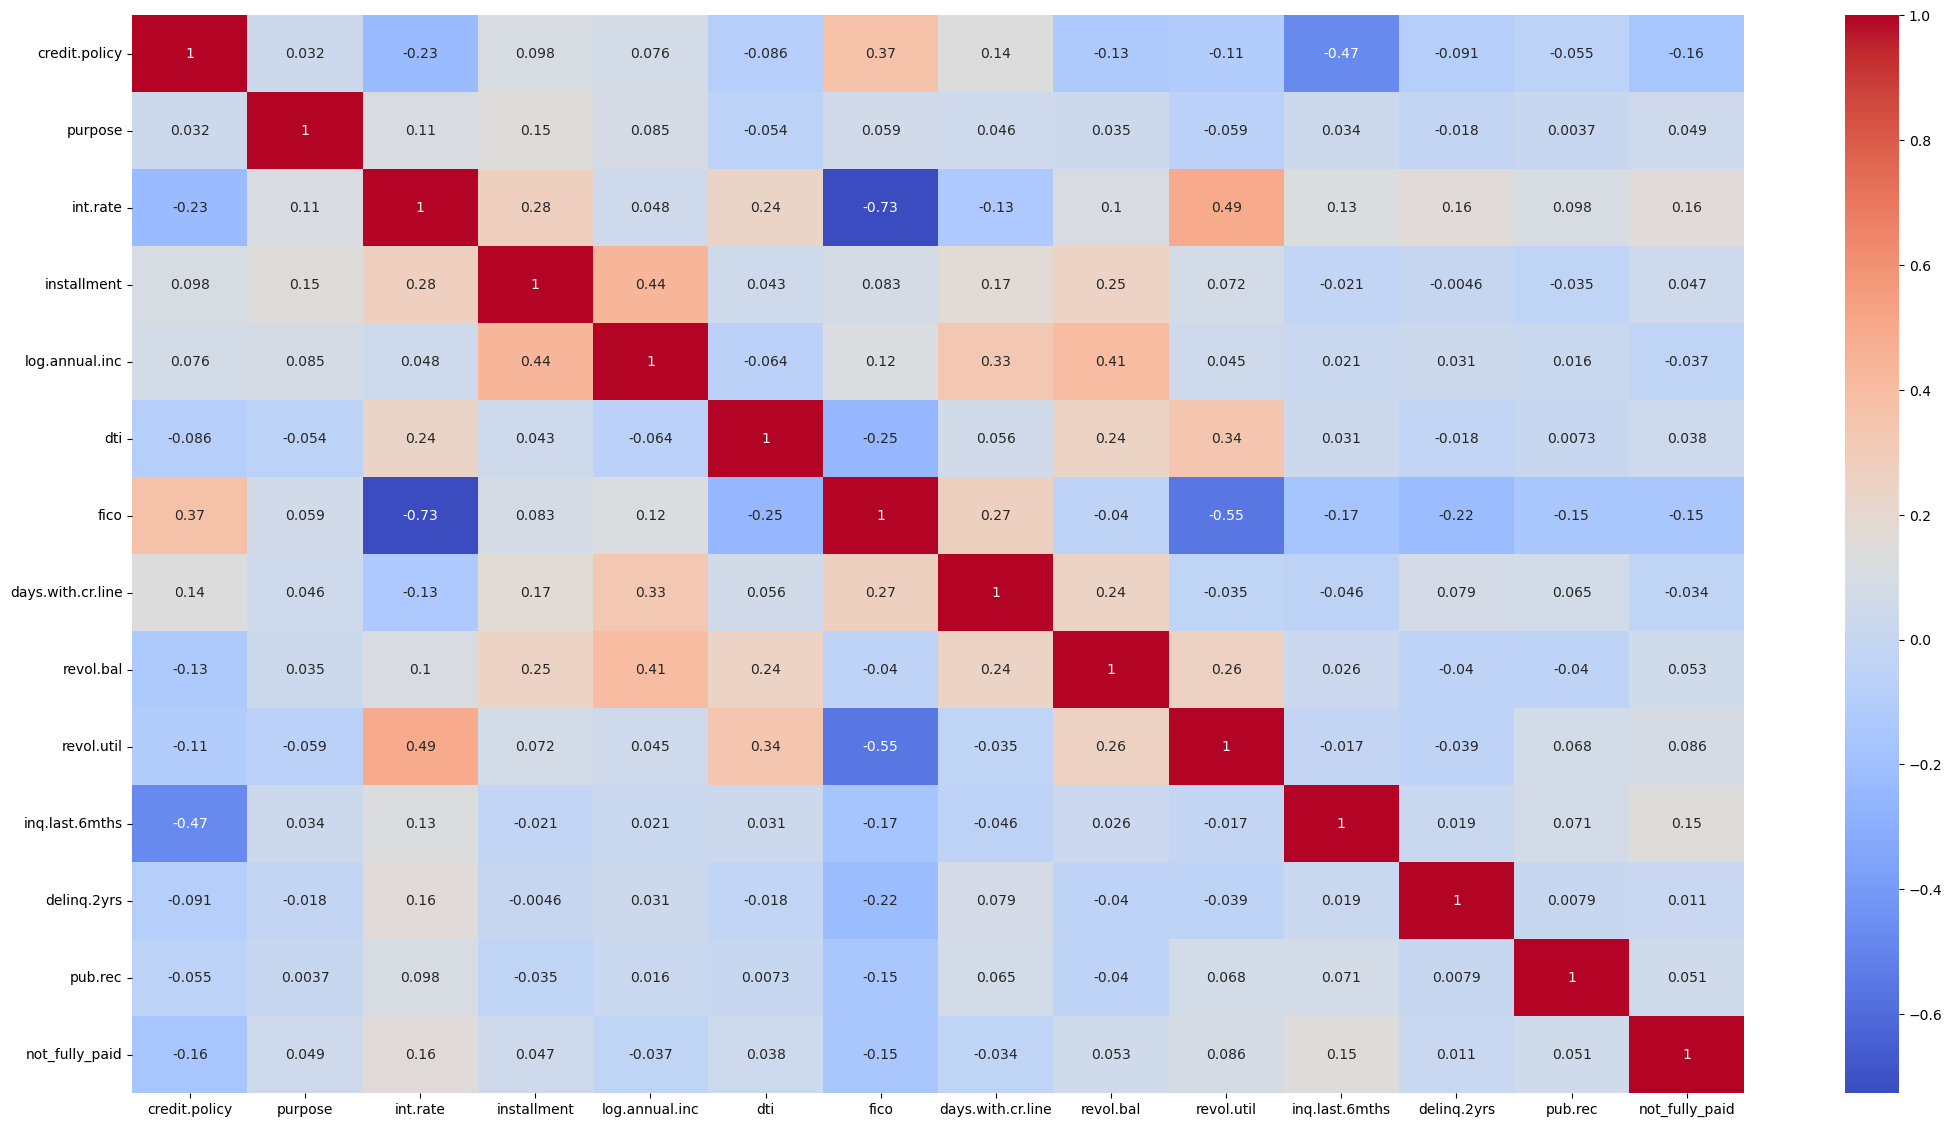

In [17]:
plt.figure(figsize=(26,14))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)


# train test split

In [18]:
x=data.drop('not_fully_paid',axis=1)
y=data['not_fully_paid']


In [19]:
print('shape of x: ',x.shape)
print('shape of y: ',y.shape)

shape of x:  (8999, 13)
shape of y:  (8999,)


In [20]:
x_train, x_test,y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=250)

In [21]:
print('Shape of X_train: ',x_train.shape)
print('Shape of Y_train: ',y_train.shape)
print('Shape of X_test: ',x_test.shape)
print('Shape of Y_test: ',y_test.shape)

Shape of X_train:  (6299, 13)
Shape of Y_train:  (6299,)
Shape of X_test:  (2700, 13)
Shape of Y_test:  (2700,)


# apply algorithms

In [28]:
#feature scaling
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

In [29]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)


In [30]:
#Support Vector Classifier Algorithm

svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(x_train_sc,y_train)

SVC()

In [31]:
train_accuracy=svc_rbf.score(x_train_sc, y_train)
test_accuracy=svc_rbf.score(x_test_sc, y_test)
print(test_accuracy)
print(train_accuracy)

0.8488888888888889
0.8483886331163677


In [32]:
y_pred=svc_rbf.predict(x_test)
y_pred

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("Classification Report\n")
print(classification_report(y_test,y_pred))
print("\n")
print("Accuracy Scores\n")

print('Train Accuracy score', train_accuracy)
print('Test Accuracy score:', test_accuracy)

Confusion Matrix 
 [[2288    0]
 [ 412    0]]


Classification Report

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2288
           1       0.00      0.00      0.00       412

    accuracy                           0.85      2700
   macro avg       0.42      0.50      0.46      2700
weighted avg       0.72      0.85      0.78      2700



Accuracy Scores

Train Accuracy score 0.8483886331163677
Test Accuracy score: 0.8488888888888889


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#addabosting classification

adaboost_clf= AdaBoostClassifier()
adaboost_clf.fit(x_train, y_train)


AdaBoostClassifier()

In [39]:
train_accuracy= adaboost_clf.score(x_train, y_train)
test_accuracy=adaboost_clf.score(x_test, y_test)
print(test_accuracy)
print(train_accuracy)

0.8422222222222222
0.8474361009684077


In [40]:
y_pred=adaboost_clf.predict(x_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("Classification Report\n")
print(classification_report(y_test,y_pred))
print("\n")
print("Accuracy Scores\n")

print('Test Accuracy score:', train_accuracy )
print('Train Accuracy score: ',test_accuracy)

Confusion Matrix 
 [[2252   36]
 [ 390   22]]


Classification Report

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2288
           1       0.38      0.05      0.09       412

    accuracy                           0.84      2700
   macro avg       0.62      0.52      0.50      2700
weighted avg       0.78      0.84      0.79      2700



Accuracy Scores

Test Accuracy score: 0.8474361009684077
Train Accuracy score:  0.8422222222222222


In [42]:
x.describe().loc['mean']

credit.policy            0.856762
purpose                  1.936771
int.rate                 0.121268
installment            316.896367
log.annual.inc          10.923897
dti                     12.540083
fico                   711.559951
days.with.cr.line     4542.516738
revol.bal            15012.889099
revol.util              46.591970
inq.last.6mths           1.397600
delinq.2yrs              0.163574
pub.rec                  0.061007
Name: mean, dtype: float64

# Deployment/ prediction

In [43]:
client1 = np.array([[0,6,0.1347,376.55,10.968198,21.27,737,8069.958333,37589,72.0,7,0,0]])#1

In [44]:
result=adaboost_clf.predict(client1)
result

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [45]:
if result==0:
    print('Loan Repayment \ Not Fully Paid')
else:
    print('Not Loan  Repayment \ Fully Paid')

Not Loan  Repayment \ Fully Paid
